Objective

The objective is to build a regressor model which can predict the heart rate of an individual. This prediction can help to monitor stress levels of the individual.

Evaluation Metric
Mean Absolute Error :


n - total number of predicted samples, xi predicted output, x actual output

MEAN_RR - Mean of RR intervals
MEDIAN_RR - Median of RR intervals
SDRR - Standard deviation of RR intervals
RMSSD - Root mean square of successive RR interval differences
SDSD - Standard deviation of successive RR interval differences
SDRR_RMSSD - Ratio of SDRR / RMSSD
pNN25 - Percentage of successive RR intervals that differ by more than 25 ms
pNN50 - Percentage of successive RR intervals that differ by more than 50 ms
KURT - Kurtosis of distribution of successive RR intervals
SKEW - Skew of distribution of successive RR intervals
MEAN_REL_RR - Mean of relative RR intervals
MEDIAN_REL_RR - Median of relative RR intervals
SDRR_REL_RR - Standard deviation of relative RR intervals
RMSSD_REL_RR - Root mean square of successive relative RR interval differences
SDSD_REL_RR - Standard deviation of successive relative RR interval differences
SDRR_RMSSD_REL_RR - Ratio of SDRR/RMSSD for relative RR interval differences
KURT_REL_RR - Kurtosis of distribution of relative RR intervals
SKEW_REL_RR - Skewness of distribution of relative RR intervals
uuid - Unique ID for each patient
VLF - Absolute power of the very low frequency band (0.0033 - 0.04 Hz)
VLF_PCT - Principal component transform of VLF
LF - Absolute power of the low frequency band (0.04 - 0.15 Hz)
LF_PCT - Principal component transform of LF
LF_NU  - Absolute power of the low frequency band in normal units
HF - Absolute power of the high frequency band (0.15 - 0.4 Hz)
HF_PCT - Principal component transform of HF
HF_NU - Absolute power of the highest frequency band in normal units
TP - Total power of RR intervals
LF_HF - Ratio of LF to HF
HF_LF - Ratio of HF to LF
SD1 - Poincaré plot standard deviation perpendicular to the line of identity
SD2 - Poincaré plot standard deviation along the line of identity
Sampen - sample entropy which measures the regularity and complexity of a time series
higuci - higuci fractal dimension of heartrate
datasetId - ID of the whole dataset
condition - condition of the patient at the time the data was recorded
HR - Heart rate of the patient at the time of data recorded



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_frequency_train=pd.read_csv("frequency_domain_features_train.csv")
df_frequency_train.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [3]:
df_frequency_test=pd.read_csv("frequency_domain_features_test.csv")
df_frequency_test.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,0.005245
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,0.025544
2,cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,0.022188
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,0.011963
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,0.089265


In [4]:
df_time_train=pd.read_csv("time_domain_features_train.csv")
df_time_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [5]:
df_time_test=pd.read_csv("time_domain_features_test.csv")
df_time_test.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075,62b75db5-bc40-4c8f-9166-daf0efcab4c2
1,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689,a99549ad-3eb6-4413-bc90-9053e7f7e684
2,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940,cb573d3a-c767-4556-b32e-ad8c08ded214
3,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198,47a0c6de-2aef-4ac3-997d-252fa6fd07f1
4,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082,de3fd54f-c74e-4fe8-bf2a-7a127f68b312


In [6]:
df_heartrate_train=pd.read_csv("heart_rate_non_linear_features_train.csv")
df_heartrate_train.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [7]:
df_heartrate_test=pd.read_csv("heart_rate_non_linear_features_test.csv")
df_heartrate_test.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,8.347898,115.862444,2.209659,1.100715,2,time pressure
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,14.542096,77.118903,2.186132,1.290615,2,no stress
2,cb573d3a-c767-4556-b32e-ad8c08ded214,9.799336,125.044377,2.051571,1.226663,2,no stress
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,11.639185,302.029812,2.080910,1.085143,2,time pressure
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,7.266567,72.579248,2.068728,1.252547,2,interruption


In [8]:
df_frequency_train.shape

(369289, 12)

In [9]:
df_time_train.shape

(369289, 20)

In [10]:
df_heartrate_train.shape

(369289, 7)

In [11]:
df_frequency_test.shape

(41033, 12)

In [12]:
df_time_test.shape

(41033, 19)

In [13]:
df_heartrate_test.shape

(41033, 7)

In [14]:
df_frequency_train.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000
mean,2199.580170,64.289242,946.530252,34.095182,95.566718,39.245603,1.615576,4.433282,3185.356025,115.977200,0.048506
std,1815.773422,16.774844,574.171780,16.040290,4.123365,45.398869,1.761073,4.123365,1923.227187,360.855129,0.049238
min,159.480176,19.031219,90.048557,2.165119,69.879083,0.061783,0.002150,0.012825,377.692795,2.319952,0.000128
25%,1001.189280,52.909877,545.449386,22.305936,93.645734,10.720312,0.346803,1.228054,1828.147788,14.737458,0.012433
50%,1667.903111,66.350237,782.716291,32.047025,96.643140,24.841938,1.039513,3.356860,2796.856587,28.789747,0.034735
75%,2654.121052,76.825032,1201.432256,44.647115,98.771946,45.272368,2.245115,6.354266,4052.260157,80.429614,0.067854
max,12617.977191,97.738848,3291.548112,77.928847,99.987175,364.486936,13.095664,30.120917,13390.684098,7796.443096,0.431043


In [15]:
df_time_train.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,3.692890e+05,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000
mean,846.650104,841.965890,109.352531,14.977498,14.976767,7.396597,73.941824,9.841143,0.866001,0.523235,0.041628,-1.756587e-06,-0.000465,0.018571,0.009701,0.009701,2.006817,0.523235,0.041628
std,124.603984,132.321005,77.117025,4.120766,4.120768,5.143834,10.337453,8.195574,0.990189,1.790348,0.699522,1.630256e-04,0.000868,0.005455,0.003897,0.003897,0.375845,1.790348,0.699522
min,547.492221,517.293295,27.233947,5.529742,5.529630,2.660381,48.737243,0.000000,0.000000,-1.894820,-2.136278,-1.233914e-03,-0.004425,0.008987,0.003220,0.003220,1.169342,-1.894820,-2.136278
25%,760.228533,755.750735,64.205641,11.830959,11.830671,4.541896,66.715776,3.666667,0.000000,-0.352783,-0.359291,-7.281695e-05,-0.000917,0.014261,0.006984,0.006984,1.749801,-0.352783,-0.359291
50%,822.951438,819.689595,82.608243,14.415918,14.415388,5.952112,74.217809,7.600000,0.466667,0.040736,-0.060966,-9.330777e-07,-0.000312,0.017318,0.008691,0.008691,1.934416,0.040736,-0.060966
75%,924.117422,916.821570,118.237002,17.927144,17.924839,7.919841,80.334937,13.333333,1.466667,0.722833,0.282417,6.911667e-05,0.000131,0.021827,0.011460,0.011460,2.221232,0.722833,0.282417
max,1322.016957,1653.122250,563.486949,26.629477,26.629392,54.523950,113.752309,39.400000,5.466667,64.088107,6.777800,1.244098e-03,0.002095,0.036571,0.026955,0.026955,3.724134,64.088107,6.777800


In [16]:
df_heartrate_train.describe()

,SD1,SD2,sampen,higuci,datasetId
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.0
mean,10.593708,154.178997,2.062471,1.182292,2.0
std,2.914795,109.170222,0.206999,0.062192,0.0
min,3.911344,38.307745,0.434576,1.033984,2.0
25%,8.368340,90.326864,2.032977,1.139929,2.0
50%,10.196621,116.221063,2.134214,1.174293,2.0
75%,12.679005,166.764850,2.181929,1.223621,2.0
max,18.836107,796.852945,2.234841,1.361219,2.0


In [17]:
#Merging all train datasets together:
from functools import reduce
dfs = [df_frequency_train,df_time_train,df_heartrate_train]
df_final_train = reduce(lambda left,right: pd.merge(left,right,on='uuid'),dfs)

In [18]:
#Merging all test datasets together:
dfs = [df_frequency_test,df_time_test,df_heartrate_test]
df_final_test = reduce(lambda left,right: pd.merge(left,right,on='uuid'),dfs)

In [19]:
#make a copy of test and train data:
df_final_train_copy=df_final_train.copy()
df_final_test_copy=df_final_test.copy()

In [20]:
df_final_train_copy.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,...,0.007969,2.143342,-0.856554,0.335218,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,...,0.004769,2.930855,-0.408190,-0.155286,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,...,0.008716,2.127053,0.351789,-0.656813,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,...,0.008660,2.050988,-0.504947,-0.386138,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,...,0.013055,1.816544,-0.548408,-0.154252,13.590641,87.718281,2.221121,1.249612,2,no stress


In [21]:
df_final_test_copy.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,datasetId,condition
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,...,0.004578,2.825038,-0.680262,-0.233075,8.347898,115.862444,2.209659,1.100715,2,time pressure
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,...,0.013921,1.806517,-0.034454,-0.051689,14.542096,77.118903,2.186132,1.290615,2,no stress
2,cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,...,0.008149,1.906180,-0.206953,-0.589940,9.799336,125.044377,2.051571,1.226663,2,no stress
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,...,0.007587,2.225116,-0.820407,0.487198,11.639185,302.029812,2.080910,1.085143,2,time pressure
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,...,0.007811,1.725606,1.738453,-0.005082,7.266567,72.579248,2.068728,1.252547,2,interruption


In [22]:
df_final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               369289 non-null  object 
 1   VLF                369289 non-null  float64
 2   VLF_PCT            369289 non-null  float64
 3   LF                 369289 non-null  float64
 4   LF_PCT             369289 non-null  float64
 5   LF_NU              369289 non-null  float64
 6   HF                 369289 non-null  float64
 7   HF_PCT             369289 non-null  float64
 8   HF_NU              369289 non-null  float64
 9   TP                 369289 non-null  float64
 10  LF_HF              369289 non-null  float64
 11  HF_LF              369289 non-null  float64
 12  MEAN_RR            369289 non-null  float64
 13  MEDIAN_RR          369289 non-null  float64
 14  SDRR               369289 non-null  float64
 15  RMSSD              369289 non-null  float64
 16  SD

In [23]:
print(df_final_train['datasetId'].value_counts())
print(df_final_train.index.nunique())

2    369289
Name: datasetId, dtype: int64
369289


'datasetId' is the same for all the records. So, this column can be removed.

In [24]:
df_final_train=df_final_train.drop(['uuid'],axis=1)
df_final_train=df_final_train.drop(['datasetId'],axis=1)

In [25]:
df_final_test=df_final_test.set_index(['uuid'])
df_final_test=df_final_test.drop(['datasetId'],axis=1)

In [26]:
df_final_test

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,condition
uuid,,,,,,,,,,,,,,,,,,,,,
62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,...,0.004578,0.004578,2.825038,-0.680262,-0.233075,8.347898,115.862444,2.209659,1.100715,time pressure
a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,...,0.013921,0.013921,1.806517,-0.034454,-0.051689,14.542096,77.118903,2.186132,1.290615,no stress
cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,...,0.008149,0.008149,1.906180,-0.206953,-0.589940,9.799336,125.044377,2.051571,1.226663,no stress
47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,...,0.007587,0.007587,2.225116,-0.820407,0.487198,11.639185,302.029812,2.080910,1.085143,time pressure
de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,...,0.007811,0.007811,1.725606,1.738453,-0.005082,7.266567,72.579248,2.068728,1.252547,interruption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11253232-cf0a-4c40-abfb-ac2795effd9b,1690.286178,75.534076,523.354248,23.387211,95.590958,24.139217,1.078713,4.409042,2237.779643,21.680663,...,0.007564,0.007564,1.883681,-0.011224,-0.243444,7.560479,115.759345,2.127188,1.169883,no stress
38052c36-d08d-4305-905b-830f600ce2b9,1335.773510,76.550710,377.825339,21.652471,92.337427,31.353638,1.796819,7.662573,1744.952487,12.050447,...,0.007507,0.007507,1.746077,6.540759,2.438418,6.150725,100.293588,1.569003,1.195527,no stress
8ef3781b-512f-42ce-bcfd-47f5c1070bb0,1762.102170,47.355959,1951.164991,52.436964,99.606646,7.705286,0.207077,0.393354,3720.972447,253.224210,...,0.010680,0.010680,2.075297,0.973106,-0.681300,15.388795,138.015139,2.131040,1.217576,interruption


In [27]:
df_final_train.isnull().sum()

VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
SD1                  0
SD2                  0
sampen               0
higuci               0
condition            0
dtype: int64

There is no null values.

In [28]:
df_final_train.describe().T

,count,mean,std,min,25%,50%,75%,max
VLF,369289.0,2199.580170,1815.773422,159.480176,1001.189280,1.667903e+03,2654.121052,12617.977191
VLF_PCT,369289.0,64.289242,16.774844,19.031219,52.909877,6.635024e+01,76.825032,97.738848
LF,369289.0,946.530252,574.171780,90.048557,545.449386,7.827163e+02,1201.432256,3291.548112
LF_PCT,369289.0,34.095182,16.040290,2.165119,22.305936,3.204703e+01,44.647115,77.928847
LF_NU,369289.0,95.566718,4.123365,69.879083,93.645734,9.664314e+01,98.771946,99.987175
HF,369289.0,39.245603,45.398869,0.061783,10.720312,2.484194e+01,45.272368,364.486936
HF_PCT,369289.0,1.615576,1.761073,0.002150,0.346803,1.039513e+00,2.245115,13.095664
HF_NU,369289.0,4.433282,4.123365,0.012825,1.228054,3.356860e+00,6.354266,30.120917
TP,369289.0,3185.356025,1923.227187,377.692795,1828.147788,2.796857e+03,4052.260157,13390.684098
LF_HF,369289.0,115.977200,360.855129,2.319952,14.737458,2.878975e+01,80.429614,7796.443096


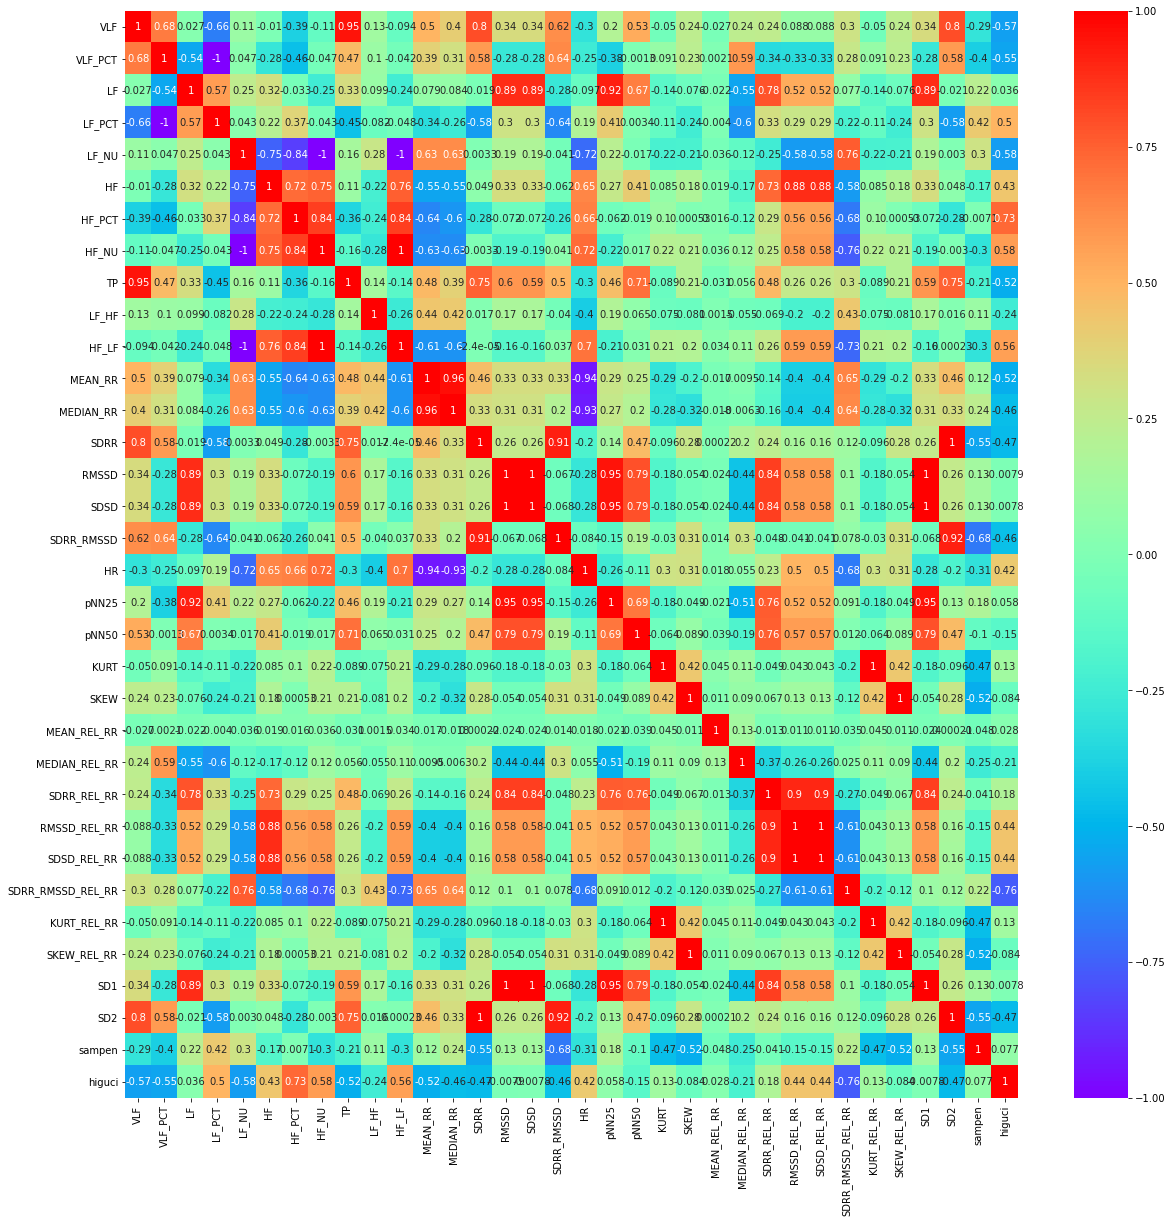

In [29]:
#plotting heatmap of correlation:
plt.figure(figsize=(20,20))
sns.heatmap(df_final_train.corr(),annot=True,cmap='rainbow')

Most of the features are highly correlated.

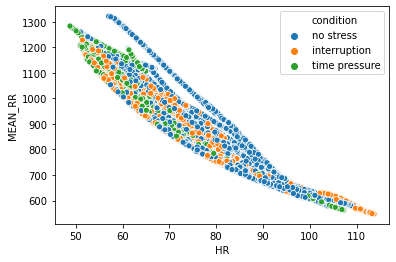

In [30]:
sns.scatterplot(df_final_train['HR'],df_final_train['MEAN_RR'], hue=df_final_train['condition'])
plt.show()

In [31]:
corr_df=df_final_train.corr().abs()
corr_df

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci
VLF,1.000000,0.676628,0.026521,0.664830,0.105044,0.010441,0.389684,0.105044,0.951800,0.126668,...,0.242427,0.087994,0.087993,0.303226,0.050392,0.236819,0.341293,0.798240,0.290457,0.570043
VLF_PCT,0.676628,1.000000,0.541976,0.995240,0.046868,0.283068,0.460465,0.046868,0.470337,0.103768,...,0.343214,0.333824,0.333824,0.277593,0.090900,0.228209,0.278996,0.581071,0.396915,0.551476
LF,0.026521,0.541976,1.000000,0.570404,0.247482,0.315662,0.032871,0.247482,0.331037,0.099452,...,0.783464,0.524338,0.524337,0.077445,0.144318,0.075650,0.887012,0.020562,0.222920,0.035736
LF_PCT,0.664830,0.995240,0.570404,1.000000,0.043265,0.216789,0.371761,0.043265,0.452276,0.082040,...,0.327483,0.288087,0.288087,0.215372,0.106355,0.238718,0.299684,0.576758,0.415872,0.496831
LF_NU,0.105044,0.046868,0.247482,0.043265,1.000000,0.749237,0.840496,1.000000,0.155373,0.281325,...,0.247067,0.582438,0.582438,0.760120,0.216003,0.205864,0.185263,0.002995,0.304454,0.577690
HF,0.010441,0.283068,0.315662,0.216789,0.749237,1.000000,0.721758,0.749237,0.107987,0.220058,...,0.732687,0.883734,0.883735,0.581391,0.085113,0.184903,0.332324,0.048295,0.171254,0.434092
HF_PCT,0.389684,0.460465,0.032871,0.371761,0.840496,0.721758,1.000000,0.840496,0.360688,0.241191,...,0.286441,0.555832,0.555832,0.682511,0.102859,0.000527,0.072056,0.281651,0.007106,0.727750
HF_NU,0.105044,0.046868,0.247482,0.043265,1.000000,0.749237,0.840496,1.000000,0.155373,0.281325,...,0.247067,0.582438,0.582438,0.760120,0.216003,0.205864,0.185263,0.002995,0.304454,0.577690
TP,0.951800,0.470337,0.331037,0.452276,0.155373,0.107987,0.360688,0.155373,1.000000,0.144087,...,0.480078,0.260477,0.260477,0.295681,0.088653,0.205367,0.594883,0.748643,0.211720,0.517278
LF_HF,0.126668,0.103768,0.099452,0.082040,0.281325,0.220058,0.241191,0.281325,0.144087,1.000000,...,0.069479,0.204986,0.204986,0.428285,0.074650,0.080524,0.170234,0.016344,0.108667,0.244251


In [32]:
c=corr_df.unstack()
co=c.sort_values(kind='quicksort')
co_df=pd.DataFrame(co)
co_df.columns=['corr']
co_df

,,corr
HF_LF,SDRR,0.000024
SDRR,HF_LF,0.000024
SD2,MEAN_REL_RR,0.000212
MEAN_REL_RR,SD2,0.000212
SDRR,MEAN_REL_RR,0.000217
...,...,...
pNN50,pNN50,1.000000
SDRR_REL_RR,SDRR_REL_RR,1.000000
higuci,higuci,1.000000
HF_NU,LF_NU,1.000000


In [33]:
co_df.reset_index(level=[0,1],inplace=True)
co_df.columns
co_df.rename(columns={'level_0':'feature1','level_1':'feature2'},inplace=True)
co_df

,feature1,feature2,corr
0,HF_LF,SDRR,0.000024
1,SDRR,HF_LF,0.000024
2,SD2,MEAN_REL_RR,0.000212
3,MEAN_REL_RR,SD2,0.000212
4,SDRR,MEAN_REL_RR,0.000217
...,...,...,...
1151,pNN50,pNN50,1.000000
1152,SDRR_REL_RR,SDRR_REL_RR,1.000000
1153,higuci,higuci,1.000000
1154,HF_NU,LF_NU,1.000000


In [34]:
co_df_hr= co_df[co_df['feature1']=='HR'] # correlation with HR

In [35]:
co_df_hr.sort_values(by='corr',ascending=False)

,feature1,feature2,corr
1143,HR,HR,1.000000
1088,HR,MEAN_RR,0.944552
1086,HR,MEDIAN_RR,0.929640
1015,HR,LF_NU,0.724268
1012,HR,HF_NU,0.724268
1006,HR,HF_LF,0.701864
997,HR,SDRR_RMSSD_REL_RR,0.675554
991,HR,HF_PCT,0.656421
987,HR,HF,0.647427
860,HR,SDSD_REL_RR,0.499867


In [36]:
# Selecting features whose correlation value is less than 0.4 with HR
remove_features_hr=co_df_hr.loc[co_df['corr']<=0.4]
remove_features_hr.reset_index(inplace=True)
remove_features_hr

,index,feature1,feature2,corr
0,71,HR,MEAN_REL_RR,0.017776
1,192,HR,MEDIAN_REL_RR,0.054649
2,256,HR,SDRR_RMSSD,0.084332
3,294,HR,LF,0.097228
4,330,HR,pNN50,0.114896
5,465,HR,LF_PCT,0.194131
6,486,HR,SD2,0.202003
7,488,HR,SDRR,0.202327
8,545,HR,SDRR_REL_RR,0.234557
9,582,HR,VLF_PCT,0.254543


In [37]:
remove_list=remove_features_hr['feature2'].to_list()
remove_list=list(set(remove_list))
remove_list

['MEDIAN_REL_RR',
 'SDRR_RMSSD',
 'SDSD',
 'SD2',
 'SDRR',
 'VLF',
 'SKEW',
 'SKEW_REL_RR',
 'sampen',
 'KURT',
 'LF',
 'KURT_REL_RR',
 'SDRR_REL_RR',
 'RMSSD',
 'SD1',
 'LF_PCT',
 'MEAN_REL_RR',
 'pNN25',
 'TP',
 'VLF_PCT',
 'pNN50']

In [39]:
## excluding the Target Variable
#remove_list.remove('HR')

len(remove_list)


21

In [40]:
df_final_train=df_final_train.drop(remove_list,axis=1)

In [41]:
df_final_test=df_final_test.drop(remove_list,axis=1)

In [42]:
df_final_train.head()

,LF_NU,HF,HF_PCT,HF_NU,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,HR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,higuci,condition
0,98.485263,15.522603,0.421047,1.514737,65.018055,0.015380,885.157845,853.763730,69.499952,0.007969,0.007969,2.143342,1.163485,no stress
1,99.695397,2.108525,0.070133,0.304603,327.296635,0.003055,939.425371,948.357865,64.363150,0.004769,0.004769,2.930855,1.084711,interruption
2,98.950472,13.769729,0.512671,1.049528,94.280910,0.010607,898.186047,907.006860,67.450066,0.008716,0.008716,2.127053,1.176315,interruption
3,98.224706,18.181913,0.529387,1.775294,55.328701,0.018074,881.757865,893.460030,68.809562,0.008660,0.008660,2.050988,1.179688,no stress
4,96.720007,48.215822,1.839473,3.279993,29.487873,0.033912,809.625331,811.184865,74.565728,0.013055,0.013055,1.816544,1.249612,no stress


In [43]:
df_final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LF_NU              369289 non-null  float64
 1   HF                 369289 non-null  float64
 2   HF_PCT             369289 non-null  float64
 3   HF_NU              369289 non-null  float64
 4   LF_HF              369289 non-null  float64
 5   HF_LF              369289 non-null  float64
 6   MEAN_RR            369289 non-null  float64
 7   MEDIAN_RR          369289 non-null  float64
 8   HR                 369289 non-null  float64
 9   RMSSD_REL_RR       369289 non-null  float64
 10  SDSD_REL_RR        369289 non-null  float64
 11  SDRR_RMSSD_REL_RR  369289 non-null  float64
 12  higuci             369289 non-null  float64
 13  condition          369289 non-null  object 
dtypes: float64(13), object(1)
memory usage: 42.3+ MB


In [44]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder= LabelEncoder()  
df_final_train['condition'] = labelencoder.fit_transform(df_final_train['condition'])

df_final_train['condition'] = df_final_train['condition'].astype('float64')
df_final_train.dtypes

LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
LF_HF                float64
HF_LF                float64
MEAN_RR              float64
MEDIAN_RR            float64
HR                   float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
higuci               float64
condition            float64
dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder= LabelEncoder()  
df_final_test['condition'] = labelencoder.fit_transform(df_final_test['condition'])

df_final_test['condition'] = df_final_test['condition'].astype('float64')
df_final_test.dtypes

LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
LF_HF                float64
HF_LF                float64
MEAN_RR              float64
MEDIAN_RR            float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
higuci               float64
condition            float64
dtype: object

In [46]:
df_final_test.dtypes


LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
LF_HF                float64
HF_LF                float64
MEAN_RR              float64
MEDIAN_RR            float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
higuci               float64
condition            float64
dtype: object

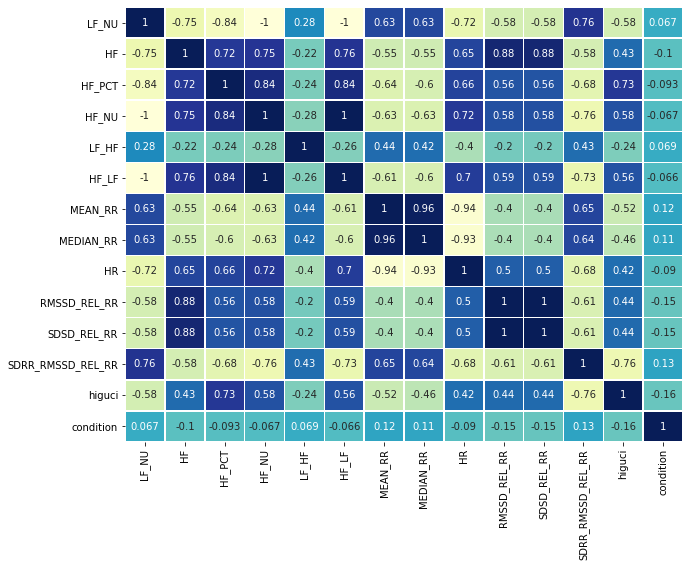

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df_final_train.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [ ]:
#X = df_final_train.drop('HR',axis=1)
#Y = df_final_train['HR']

In [48]:
# Separating dependent and independent variables
X_train = df_final_train.drop('HR',axis=1)
Y_train = df_final_train['HR']
X_test = df_final_test


In [ ]:
# Splitting the data into train and test
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.3, random_state=1)

In [ ]:
algo= []
Accuracy = []
mae = []
# Blanks list to store model name,Accuracy and MAE

In [ ]:
# Linear Regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([('scaler', StandardScaler()),('reg', LinearRegression())])

pipeline.fit(X_train, Y_train)


# Make predictions using the testing set
Y_predict= pipeline.predict(X_test)


# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))

print('Test Accuracy: %.3f' % pipeline.score(X_test, Y_test))
algo.append('Linear Regression')
Accuracy.append(pipeline.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))


In [49]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)

model.fit(X_train, Y_train)

Y_predict= model.predict(X_test)
# The mean squared error
#print('Mean squared error: %.2f'% mean_absolute_error(Y_test, Y_predict))

#print('Model Score: %.3f' % model.score(X_test, Y_test))


#algo.append('Random Forest')
#Accuracy.append(model.score(X_test, Y_test))
#mae.append(mean_absolute_error(Y_test, Y_predict))


In [ ]:

# Bagging

from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(random_state=7)

model.fit(X_train, Y_train)

Y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, Y_test))


algo.append('Bagging')
#cv_r2_mean.append(cross_val_score(model, X, Y, cv=k).mean())
Accuracy.append(model.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))
#cv_rmse_mean.append((-cross_val_score(model, X, Y, cv=k, scoring='neg_mean_squared_error').mean())**0.5);

In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=7)

model.fit(X_train, Y_train)

Y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, Y_test))
algo.append('AdaBoost')
#cv_r2_mean.append(cross_val_score(model, X, Y, cv=k).mean())
Accuracy.append(model.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))
#cv_rmse_mean.append((-cross_val_score(model, X, Y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=7)

model.fit(X_train, Y_train)
Y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, Y_test))

algo.append('Gradient Boosting')
#cv_r2_mean.append(cross_val_score(model, X, Y, cv=k).mean())
Accuracy.append(model.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))
#cv_mae_mean.append((-cross_val_score(model, X, Y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [ ]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['Accuracy'] = Accuracy
results['MAE'] = mae
results = results.set_index('Model')
results

In [ ]:
results.to_csv(r'C:\Users\Priya\Downloads\results_HRPM_v1.csv', index = False)

In [52]:
df_final_test['HR']=Y_predict
df_final_test.reset_index(inplace=True)

In [53]:
df = pd.DataFrame({'uuid': df_final_test['uuid'], 'HR': df_final_test['HR']})
df

,uuid,HR
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,64.709380
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,73.777377
2,cb573d3a-c767-4556-b32e-ad8c08ded214,69.196872
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,60.408490
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,77.810541
...,...,...
41028,11253232-cf0a-4c40-abfb-ac2795effd9b,80.979547
41029,38052c36-d08d-4305-905b-830f600ce2b9,98.672679
41030,8ef3781b-512f-42ce-bcfd-47f5c1070bb0,60.966144
41031,2bf689f3-af22-426d-91cf-e9e173ad3a54,77.412744


In [54]:
df.to_csv(r'C:\Users\Priya\Downloads\Heart_Rate_Predictor_Model_version_1.csv', index = False)